In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline

In [2]:
disney = pd.read_csv('Stocks/DIS.csv')
def date(x):
    return datetime.strptime(x, '%Y-%m-%d')
disney.index = map(date,disney.Date)
del disney['Date']
disney = disney.head(2000)
disney.head()

,Open,High,Low,Close,Volume,Adj Close
2015-10-22,110.669998,113.349998,110.389999,113.250000,9844700,113.250000
2015-10-21,110.669998,111.559998,110.010002,110.089996,8769800,110.089996
2015-10-20,109.550003,110.529999,109.410004,109.839996,9542400,109.839996
2015-10-19,108.250000,109.970001,107.940002,109.470001,7974900,109.470001
2015-10-16,108.269997,108.500000,107.459999,108.239998,5739600,108.239998


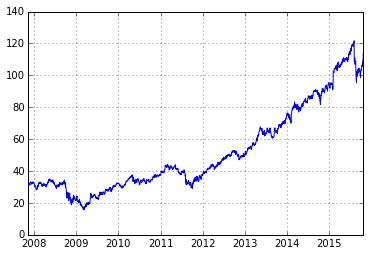

In [3]:
fig, ax = plt.subplots()
sc = ax.plot(disney.index,
            disney.Close)
ax.grid()

plt.show()

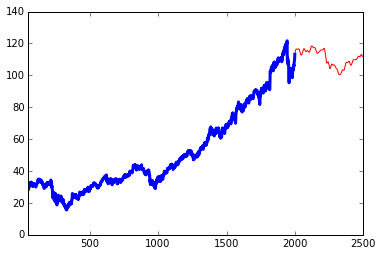

In [4]:
def fourierExtrapolation(x, n_predict,n_harm=100):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = np.fft.fft(x_notrend)  # detrended x in frequency domain
    f = np.fft.fftfreq(n)              # frequencies
    indexes = range(n)
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t
    
def turn_time(x):return x.value
y = disney['Close'][::-1]
n_predict = 500
n_harm=100
extrapolationY = fourierExtrapolation(y, n_predict,n_harm)
fig, ax = plt.subplots()
ax.plot(np.arange(0, extrapolationY.size), extrapolationY, 'r', label = 'extrapolation')
ax.plot(np.arange(0, y.size), y, 'b', label = 'x', linewidth = 3)
ax.set_xlim(left=50)
plt.show()

In [ ]:
from pandas.io.data import DataReader
from datetime import datetime
def getHist(ticker='IBM',value = 'Adj Close'):
    stock = DataReader(ticker,  'yahoo', datetime(2000,1,1), datetime.now())
    #stock = stock.iloc[::-1]
    return(stock[value])

def testStock(ticker='DIS',daysFromDivergence=180,nHarmonies=100, plot = True):
    data = getHist(ticker)
    past = data.iloc[:-daysFromDivergence]
    future =fourierExtrapolation(past, daysFromDivergence,nHarmonies)
    if plot:
        fig, ax = plt.subplots()
        fig.suptitle('%s divergence %s days ago'%(ticker,daysFromDivergence), fontsize=14, fontweight='bold')
        ax.plot(np.arange(0, data.size), data, 'g', label = 'actual', linewidth = 1)
        ax.plot(np.arange(0, future.size), future, 'r', label = 'extrapolation')
        ax.plot(np.arange(0, past.size), past, 'b', label = 'past', linewidth = 3)
        ax.legend(loc=2)
        ax.set_xlim(left=50)
        plt.show()
    if data[-1] > past[-1]:
        if future[-1]>past[-1]:return True
        else: return False
    if data[-1] < past[-1]:
        if future[-1]<past[-1]:return True
        else: return False
        

In [ ]:
from IPython.display import clear_output

    
tickers = pd.read_csv('nasdaqlisted.txt',sep='|')['Symbol']
guesses = []
n=0
for ticker in tickers:
    try:
        print n,ticker,'{0:.1f}% done'.format(float(n)/len(tickers) * 100)
        if testStock(ticker,plot=False,daysFromDivergence=5):
            guesses.append(True)
        else:guesses.append(False)

    except:pass

    n+=1
    if n%10==0:
        clear_output()
        print 'total guesses:' , len(guesses)
        print 'got ', guesses.count(True),'right and ',guesses.count(False),'wrong'
        print 'was right {0:.2f}% of the time'.format(float(guesses.count(True))/len(guesses) * 100)
        print 

total guesses: 19
got  7 right and  12 wrong
was right 36.84% of the time

20 ABIL 0.6% done
21 ABIO 0.7% done
22 ABMD 0.7% done
23 ABTL 0.7% done
24 ABTX 0.8% done
25